In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)



e:\AIDU\flower_classification


In [2]:
from libs.common import *
from config.config import *
from utils.utils import load_data, flower_labels, view_hist_data,view_images
import matplotlib.pyplot as plt

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
data_dir="../../data"
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [5]:
from config.config import *
from utils.utils import processing_data

# csv_path = os.path.join(dataset_dir, "fer2013", "fer2013.csv")
# output_dir = os.path.join(data_dir, "preprocessing")
# processing_data(csv_path, output_dir)

In [6]:
from config.config import *
from utils.utils import load_data, flower_labels, view_hist_data,view_images
import matplotlib.pyplot as plt

In [7]:
train_path = os.path.join(data_dir, "train.csv").replace("\\", "/")
test_path = os.path.join(data_dir, "val.csv").replace("\\", "/")
# test_path = os.path.join(data_dir, "preprocessing", "test.npz")
print(train_path)

e:/AIDU/flower_classification/data/train.csv


In [8]:
(x_train, y_train), (x_test, y_test)= load_data(train_path, test_path)

Read train data:  e:/AIDU/flower_classification/data/train.csv
['train/carnation/6838762136_f8254d6a1a_c.jpg'
 'train/carnation/3540544866_823aee81af_c.jpg'
 'train/carnation/50034862576_b0f55b7b3b_c.jpg' ...
 'train/common_daisy/26267498316_8ed1c153b4_c.jpg'
 'train/common_daisy/50560319813_debdfea05e_c.jpg'
 'train/common_daisy/7462259536_7f096c222f_c.jpg']
Read valid data:  e:/AIDU/flower_classification/data/val.csv


train/carnation/6838762136_f8254d6a1a_c.jpg
Training images:  13642  - shape:  (256, 256, 3)
Validating images:  98  - shape:  (256, 256, 3)


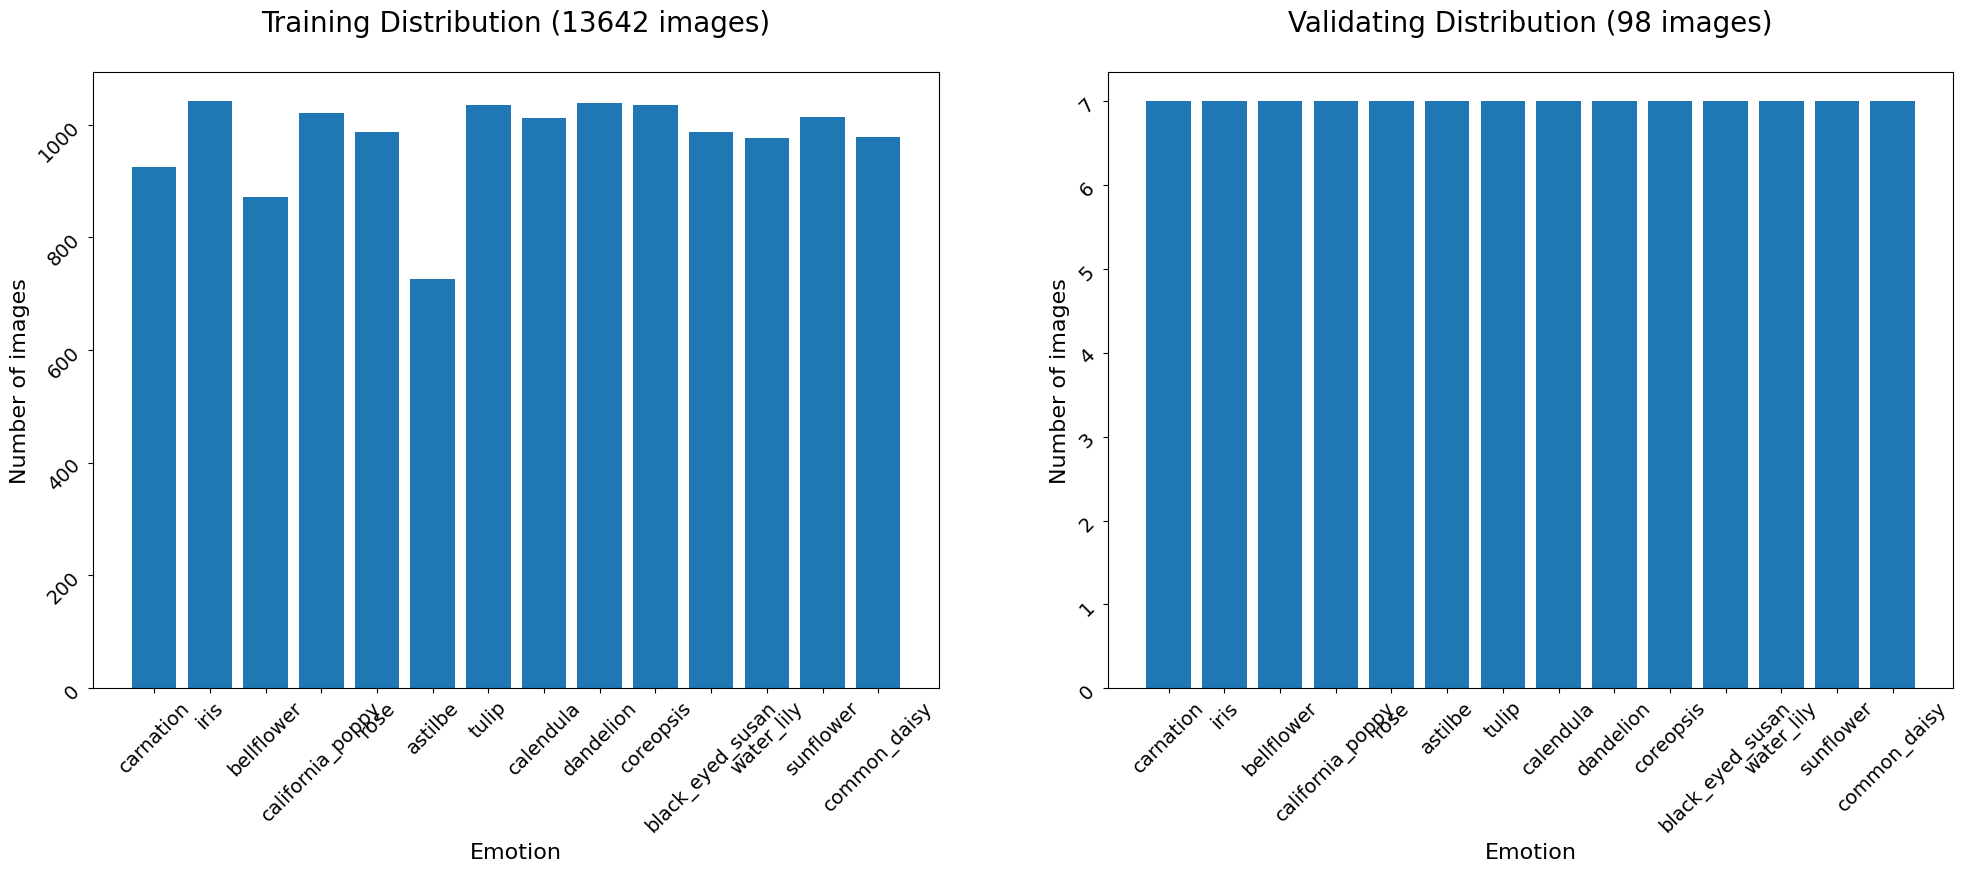

In [9]:
view_hist_data(x_train, y_train, x_test, y_test, save_path = f'{save_dir}/distribution.png')

Sample training images


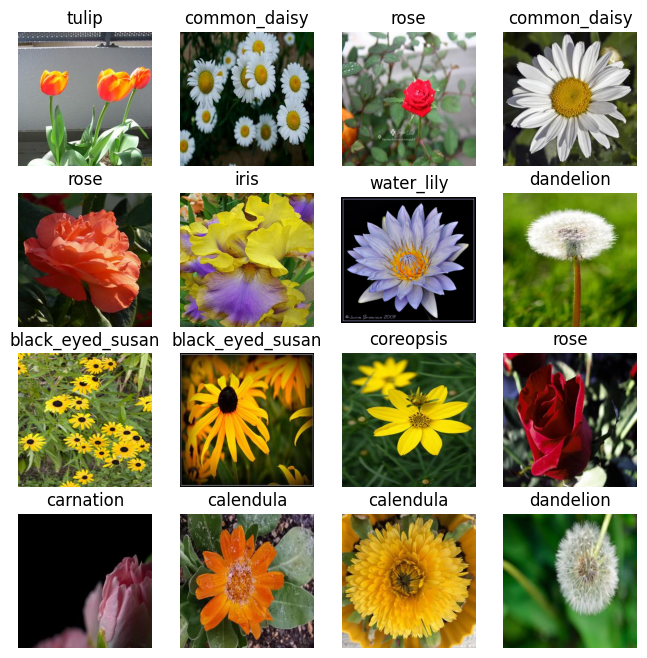

Sample Test images


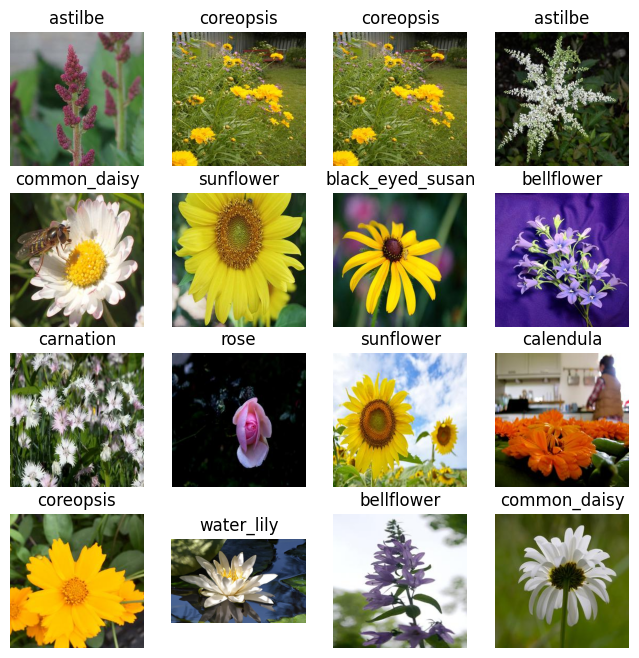

In [10]:
print("Sample training images")
view_images(x_train, y_train, None, rows = 4, cols = 4, figsize = (8, 8), 
            save_path = f'{save_dir}/sample_training_images.png')

print("Sample Test images")
view_images(x_test, y_test, None, rows = 4, cols = 4, figsize = (8, 8), 
            save_path = f'{save_dir}/sample_validating_images.png')



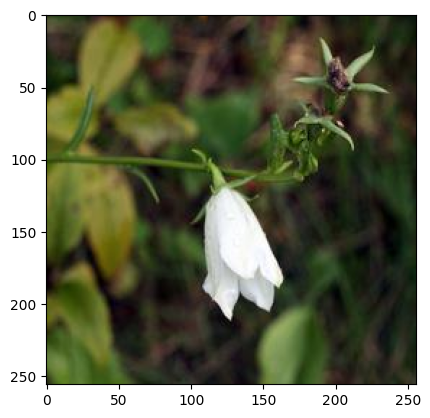

In [12]:
flow1 = cv2.imread(f'{data_dir}/train/bellflower/48917780_834f0a1ce3_c.jpg')
flow1 = cv2.cvtColor(flow1,cv2.COLOR_BGR2RGB)
plt.imshow(flow1)

In [13]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1,
                               height_shift_range=0.1, 
                               rescale=1/255, 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True, 
                               fill_mode='nearest', 
                               validation_split=0.2
                              )

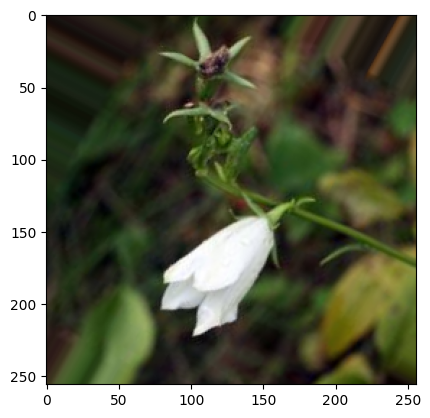

In [15]:
plt.imshow(image_gen.random_transform(flow1))

In [16]:
batch_size = 32
target_size = (224,224)
train_image_gen = image_gen.flow_from_directory(f'{data_dir}/train',
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training')

Found 10919 images belonging to 14 classes.


In [24]:
valid_image_gen = image_gen.flow_from_directory(f'{data_dir}/train',
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='validation')

Found 2723 images belonging to 14 classes.


In [18]:
train_image_gen.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'dandelion': 8,
 'iris': 9,
 'rose': 10,
 'sunflower': 11,
 'tulip': 12,
 'water_lily': 13}

In [25]:
current_class_indices = train_image_gen.class_indices

desired_order = ["carnation", "iris", "bellflower", "california_poppy", "rose", "astilbe", 
                 "tulip", "calendula", "dandelion", "coreopsis", "black_eyed_susan", 
                 "water_lily", "sunflower", "common_daisy"]

sorted_class_indices = {}
for idx, label in enumerate(desired_order):
    if label in current_class_indices:
        sorted_class_indices[label] = idx

train_image_gen.class_indices = sorted_class_indices
valid_image_gen.class_indices = sorted_class_indices
print(train_image_gen.class_indices)
print(valid_image_gen.class_indices)


{'carnation': 0, 'iris': 1, 'bellflower': 2, 'california_poppy': 3, 'rose': 4, 'astilbe': 5, 'tulip': 6, 'calendula': 7, 'dandelion': 8, 'coreopsis': 9, 'black_eyed_susan': 10, 'water_lily': 11, 'sunflower': 12, 'common_daisy': 13}
{'carnation': 0, 'iris': 1, 'bellflower': 2, 'california_poppy': 3, 'rose': 4, 'astilbe': 5, 'tulip': 6, 'calendula': 7, 'dandelion': 8, 'coreopsis': 9, 'black_eyed_susan': 10, 'water_lily': 11, 'sunflower': 12, 'common_daisy': 13}
